In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/ok_pan_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [ ]:
feature_path = './data/urban/tl_2018_40_tabblock10.shp'
feature = gd.read_file(feature_path).to_crs(grid.crs)
feature = feature.set_index('GEOID10')
feature = gd.clip(feature, grid)

In [ ]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['UR10'] = gd.sjoin(grid, feature, how="left", op="within")['UR10']
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

In [4]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [ ]:
grid['urban'] = grid['UR10'].map({'U': True, 'R': False})

In [ ]:
grid[grid['UR10'] == 'R']

In [5]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [ ]:
confusion_matrix = pd.crosstab(grid['agreement'], grid['urban'], rownames=['Agreement'], colnames=['Urban'])
print (confusion_matrix)

In [ ]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [6]:
confusion_matrix = pd.crosstab(grid['chg_covera'], grid['verizon_co'], rownames=['Challenger Cover'], colnames=['FCC 477 Verizon Coverage'])
print (confusion_matrix)

FCC 477 Verizon Coverage    0      1
Challenger Cover                    
0                         526  14339
1                          15   3435


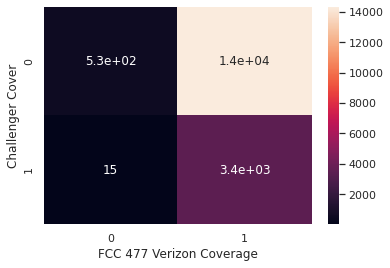

In [7]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()